### Linear Regression

Consider the relation between advertisment in radio (given in $) and the sales actually generated. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
advertising = pd.read_csv('Advertising.csv')

In [3]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


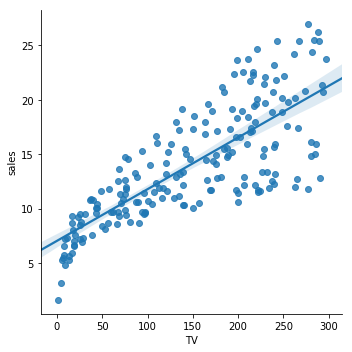

In [4]:
sns.lmplot('TV', 'sales', data =  advertising)

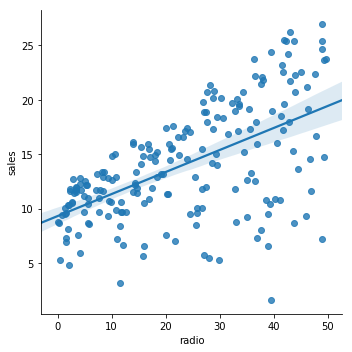

In [5]:
sns.lmplot('radio', 'sales', data = advertising)

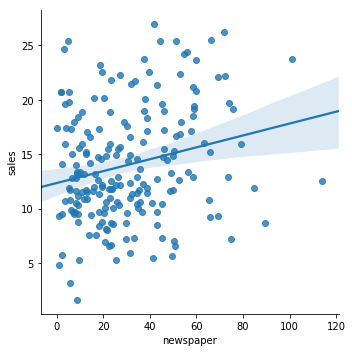

In [6]:
sns.lmplot('newspaper', 'sales', data = advertising)

We can see the linear regression fit on all the plots above. We can also do a linear fit using standard fitting techniques such as the least square method. Let us consider the relation between the advertisements on TV and sales.

In [7]:
def linear_func(x, a, b):
    return a + b*x

In [8]:
ad_TV = advertising.iloc[:,1:2].values
sales = advertising.iloc[:,4:5].values

In [9]:
popt_TV, pcov_TV = curve_fit(linear_func, ad_TV.flatten(), sales.flatten(), p0=[5,2])

In [10]:
linear_reg = linear_model.LinearRegression()

In [11]:
linear_reg = linear_reg.fit(ad_TV, sales)

In [12]:
predict_regression = linear_reg.predict(ad_TV)

In [13]:
predict_fit = linear_func(ad_TV, popt_TV[0], popt_TV[1])

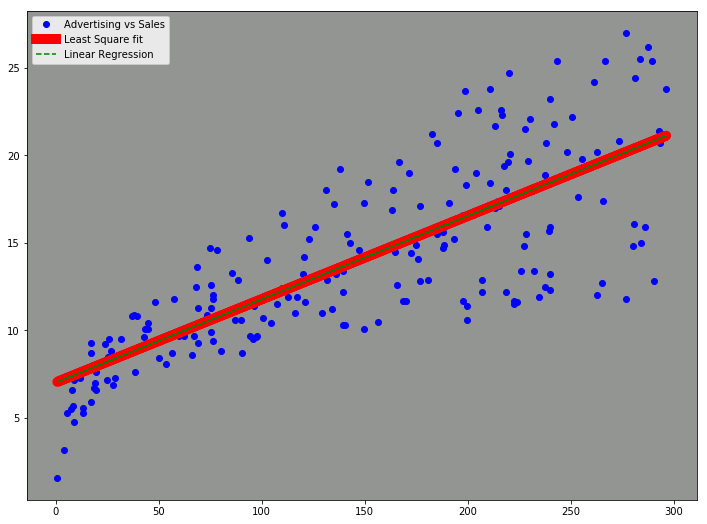

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (12, 9))
ax.plot(ad_TV, sales, 'bo', label = 'Advertising vs Sales')
ax.plot(ad_TV, predict_fit, 'r-', label = 'Least Square fit', linewidth=10)
ax.plot(ad_TV, predict_regression, 'g--', label = 'Linear Regression')
ax.legend(loc = 'best')
ax.set_facecolor('xkcd:gray')

Let us create a dataset of our own to show how noise can change the regression line from the actual population line. Let us assume a relation of the form $f=\beta_0+\beta_1*x$. In order to simulate the data we will add Gaussian noise to this data given by $f =\beta_0+\beta_1*x+\epsilon $

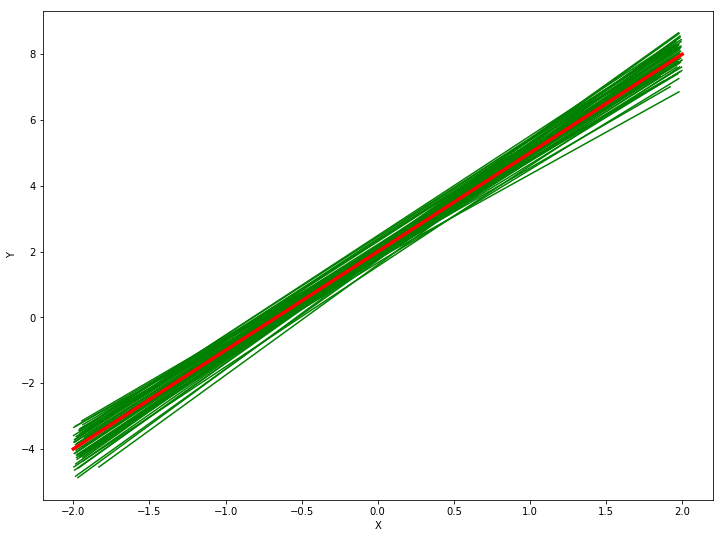

In [27]:
def linear_func(x):
    return 2+3*x
x_unique = np.linspace(-2, 2, 100)
plt.figure(figsize = (12, 9))

plt.xlabel('X')
plt.ylabel('Y')
import operator
for i in range(50):
    x_random = np.random.uniform(-2, 2, 100).reshape(100, 1)
    y_random = linear_func(x_random) + 2*np.random.normal(size = 100).reshape(100,1)
    linear_reg = linear_model.LinearRegression()
    linear_reg = linear_reg.fit(x_random, y_random)
    y_predict = linear_reg.predict(x_random)
    x_random = list(x_random)
    y_predict = list(y_predict)
    L = sorted(zip(x_random,y_predict), key=operator.itemgetter(0))
    x_sort, y_sort = zip(*L)
    plt.plot(np.array(x_sort)[:,0], np.array(y_sort)[:,0], 'g')
    #plt.plot(x_random, y_random, 'bo')
plt.plot(x_unique, linear_func(x_unique), 'r-', linewidth = 3.5)
plt.show()

The idea that the we can several linear regression lines when using different observed samples for the same population line is a natural extension of the idea in statistics where we draw different samples from a population in order to estimate the characteristics of the total population. 

In general if we have a population Y and we want to obtain the mean, $\mu$ of some specific characteristic of Y. It would be hard to obtain information of the characteristic for the entire population. What is possible is to obtain the mean, $\hat{\mu}_i$, for a smaller sample $y_i$ drawn from Y. This would be give a reasonable estimate of the population mean. We can either underestimate or over-estimate the mean using technique. However if we draw several samples from the population and take the average of the mean of each sample, this value should be pretty close to the real value, $\mu$.

This is similar to the case of the linear regression shown in the above cell. we use different samples to estimate the regression line. Each individual line is different from the actual population line. However an average of the various regression lines will be closer to the actual population line

### Accuracy
In the case we have a sample mean ($\hat{\mu}$), we would like to know the error in the estimate of the actual mean ($\mu$). The error, obtained from statistical theory, is known as the standard error given by:
\begin{equation}
Var\left(\hat{\mu}\right) = SE\left(\hat{\mu}\right)^2 = \frac{\sigma^2}{n}
\end{equation}
where $\sigma$ is the sample standard deviation of each sample realization $y_i\subset Y$ and $n$ is the size of the sample.

In a similar fashion we will be able to compute the error in the parameters obtained from linear regression $\hat{\beta}_0$ and $\hat{\beta}_1$ as follows:

\begin{equation}
SE(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n}+\frac{\bar{x}^2}{\Sigma_{i=1}^{n}\left(x_i -\bar{x}\right)^2}\right]
\end{equation}



\begin{equation}
SE\left(\hat{\beta}_1\right)^2 =  \frac{\sigma^2}{\Sigma_{i=1}^{n}\left(x_i - \bar{x}\right)^2}
\end{equation}

where $\sigma^2 =  Var\left(\epsilon\right)$ . One of the conditions to use the above relations is that the errors $\epsilon_i$ are supposed to be uncorrelated. This is not always strictly true. However a reasonable explanation can be still obtained.

In general it is not possible to obtain $\sigma$. However, we can estimate it from the samples drawn. We estimate of $\sigma$ known as residual standard error(RSE) is given by $RSE = \sqrt{\frac{RSS}{n-2}}$. The $RSS$ is divided by $n-2$ in order to take into account the number of parameters (two in the case of 2D linear regression).

Standard errors are useful in calculating the confidence intervals (CI). 

For linear regression, the $95\text{ }\%$ confidence for $\beta_1$ is approximated by:
\begin{equation}
\left[\hat{\beta}_1-2. SE\left(\hat{\beta}_1\right),\hat{\beta}_1+2. SE\left(\hat{\beta}_1\right)\right]
\end{equation}

There is 95 % probability that the value of $\beta_1$ will line in the interval given above. We can similarly define a 95 % confidence interval for $\beta_0$.

### Hypothesis testing using Standard Errors

The common hypothesis testing involves testing the null hypothesis:

$H_0$: There is no relationship between X and Y

and the alternate hypothesis:

$H$: There is a relationship between X and Y
    
Mathematically this can be expressed as:

$H_0:\text{ }\beta_1 = 0$

$H:\text{ }\beta\neq1$

If $\beta_1 = 0\implies Y = \beta_0 + \epsilon$ and X is not associated with $Y$. Now in order to test the null hypothesis we need to check if $\hat{\beta}_1$ is sufficiently away from zero. This can be tested using $SE\left(\hat{\beta}_1\right)$. If we have a small value of $SE\left(\hat{\beta}_1\right)$, then even a small value of $\beta_1$ would provide a strong evidennce for $\beta_1=0$, and to have a relationship between X and Y. If $SE\left(\hat{\beta}_1\right)$ is large then $\beta_1$ must also have a large absolute value in order to reject the null hypothesis.

In practice we do a *t-statistic* given by:
\begin{equation}
t = \frac{\hat{\beta}_1-0}{SE\left(\hat{\beta}_1\right)}
\end{equation}

which basically checks how many standard deviations $\hat{\beta}_1$ is away from zero. If there is no relationship between X and Y we expect the above distribution will have a *t-distribution* with *n-2* degrees of freedom. For $n>30$, the distribution is similar to a Gaussian distribution. 

Text(0,0.5,'Sales')

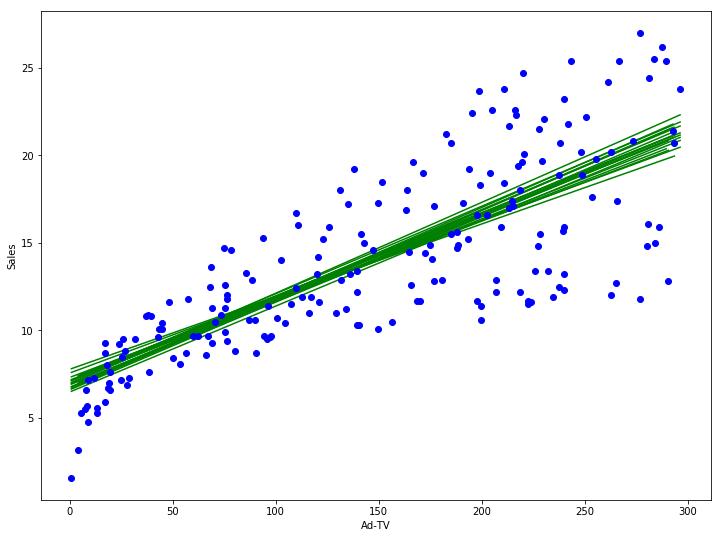

In [69]:
coefficient = []
intercept = []
plt.figure(figsize = (12,9))
for i in range(20):
    linear_reg = linear_model.LinearRegression()
    random_indice = np.random.randint(0, 199, 200 )
    x_random = ad_TV[random_indice]
    y_random = sales[random_indice]
    linear_reg = linear_reg.fit(x_random, y_random)
    y_predict = linear_reg.predict(x_random)
    x_random = list(x_random)
    y_predict = list(y_predict)
    L = sorted(zip(x_random,y_predict), key=operator.itemgetter(0))
    x_sort, y_sort = zip(*L)
    coefficient.append(linear_reg.coef_[0][0])
    intercept.append(linear_reg.intercept_[0])
    plt.plot(np.array(x_sort)[:,0], np.array(y_sort)[:,0], 'g')
plt.plot(ad_TV, sales, 'bo', label = 'Advertising vs Sales')
plt.xlabel('Ad-TV')
plt.ylabel('Sales')

In [70]:
from scipy.stats import ttest_1samp, sem

In [67]:
ttest_1samp(coefficient, 0)

Ttest_1sampResult(statistic=75.05989927776318, pvalue=5.741562535023374e-25)

In [71]:
mean_TV_coeff = np.mean(coefficient)
std_error_TV_coeff = sem(coefficient)
print(mean_TV_coeff)
print(std_error_TV_coeff)

0.04796181454447227
0.0006061113981173979


In [68]:
ttest_1samp(intercept, 0)

Ttest_1sampResult(statistic=82.27035544352408, pvalue=1.0101171278140145e-25)

In [73]:
from statsmodels.formula.api import ols
model = ols("sales ~ TV", advertising).fit()

In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.47e-42
Time:                        09:37:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [77]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
print(linear_reg.)